In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
engineer_feature_cols = ["Average_Price", "Supply_Volume", "imported_tomato_price"]
lag_range=[1,7,30]
roll_range=[7,30,90]
standard_deviation_lag=False

In [25]:
np.random.seed(42)

# Create directories for saving artifacts
os.makedirs("artifacts/eda_images", exist_ok=True)
os.makedirs("artifacts/data", exist_ok=True)

In [26]:
data_path = "tomato_data.csv"
df = pd.read_csv(data_path)

In [27]:
print("Shape:", df.shape)
print("\nSample:")
display(df.head())

Shape: (1389, 17)

Sample:


,Date,Average_Price,Supply_Volume,Temperature,Precipitation,Wind_Speed,Air_Pressure,Rainfall_MM,USD_TO_NPR,Diesel,is_festival,imported_tomato_price,Season_Autumn,Season_Monsoon,Season_Spring,Season_Winter,Inflation
0,2022-01-01,115.00,0.0,9.0,0.0,4.7,1023.5,0.0,117.49,119.0,0,101.00,False,False,False,True,6.03
1,2022-01-02,115.00,8000.0,9.8,0.0,4.5,1022.3,0.0,117.49,119.0,0,115.00,False,False,False,True,6.03
2,2022-01-03,95.00,22375.0,10.0,0.0,5.3,1020.6,0.0,117.49,119.0,0,95.00,False,False,False,True,6.03
3,2022-01-04,96.67,8000.0,10.2,0.0,5.0,1020.6,0.0,117.47,119.0,0,96.67,False,False,False,True,6.03
4,2022-01-05,86.67,32500.0,11.0,0.0,5.8,1020.6,0.0,117.55,119.0,0,86.67,False,False,False,True,6.03


In [28]:
print("\n--- Dataset Info ---")
df.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   1389 non-null   object 
 1   Average_Price          1389 non-null   float64
 2   Supply_Volume          1389 non-null   float64
 3   Temperature            1389 non-null   float64
 4   Precipitation          1389 non-null   float64
 5   Wind_Speed             1389 non-null   float64
 6   Air_Pressure           1389 non-null   float64
 7   Rainfall_MM            1389 non-null   float64
 8   USD_TO_NPR             1389 non-null   float64
 9   Diesel                 1389 non-null   float64
 10  is_festival            1389 non-null   int64  
 11  imported_tomato_price  1389 non-null   float64
 12  Season_Autumn          1389 non-null   bool   
 13  Season_Monsoon         1389 non-null   bool   
 14  Season_Spring          1389 non-nu

In [29]:
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
Date                     0
Average_Price            0
Supply_Volume            0
Temperature              0
Precipitation            0
Wind_Speed               0
Air_Pressure             0
Rainfall_MM              0
USD_TO_NPR               0
Diesel                   0
is_festival              0
imported_tomato_price    0
Season_Autumn            0
Season_Monsoon           0
Season_Spring            0
Season_Winter            0
Inflation                0
dtype: int64


In [30]:
# Handle missing values (simple strategy)
df = df.fillna(method="ffill").fillna(method="bfill")

# Remove duplicates if any
df = df.drop_duplicates()


C:\Users\gaurav\AppData\Local\Temp\ipykernel_19852\3788735594.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill").fillna(method="bfill")


In [31]:

print("\n After cleaning:")
print(df.shape)


 After cleaning:
(1389, 17)


In [32]:
print("\n--- Descriptive Statistics ---")
display(df.describe().T)


--- Descriptive Statistics ---


,count,mean,std,min,25%,50%,75%,max
Average_Price,1389.0,64.058099,22.037352,17.67,53.33,60.29,74.09,170.00
Supply_Volume,1389.0,11259.541037,21777.720620,0.00,0.00,1500.00,11250.00,185920.00
Temperature,1389.0,18.869755,4.861757,5.80,14.53,20.20,23.15,26.80
Precipitation,1389.0,4.518272,9.983160,0.00,0.00,0.00,3.80,76.20
Wind_Speed,1389.0,7.235184,1.563728,2.10,6.20,7.00,8.28,13.40
Air_Pressure,1389.0,1014.944320,4.509063,1002.10,1011.80,1015.00,1018.55,1025.00
Rainfall_MM,1389.0,5.901980,11.904979,0.00,0.00,0.50,7.80,155.90
USD_TO_NPR,1389.0,130.582649,5.103658,116.68,129.14,131.37,132.83,140.89
Diesel,1389.0,157.093952,13.093304,119.00,150.00,155.00,166.25,178.00
is_festival,1389.0,0.197264,0.398077,0.00,0.00,0.00,0.00,1.00


In [33]:
df.describe().to_csv("artifacts/data/summary_stats.csv")


In [34]:
# Helper function to save figures automatically
def save_fig(fig, name):
    fig_path = f"artifacts/eda_images/{name}.png"
    fig.savefig(fig_path, bbox_inches='tight', dpi=200)
    plt.close(fig)
    print(f" Saved: {fig_path}")


In [35]:
num_cols = df.select_dtypes(include=['number','bool']).columns


In [36]:
for col in num_cols:
    fig, ax = plt.subplots(figsize=(6,4))
    sns.histplot(df[col], kde=True, ax=ax, color="teal")
    ax.set_title(f"Distribution of {col}")
    save_fig(fig, f"dist_{col}")


 Saved: artifacts/eda_images/dist_Average_Price.png
 Saved: artifacts/eda_images/dist_Supply_Volume.png
 Saved: artifacts/eda_images/dist_Temperature.png
 Saved: artifacts/eda_images/dist_Precipitation.png
 Saved: artifacts/eda_images/dist_Wind_Speed.png
 Saved: artifacts/eda_images/dist_Air_Pressure.png
 Saved: artifacts/eda_images/dist_Rainfall_MM.png
 Saved: artifacts/eda_images/dist_USD_TO_NPR.png
 Saved: artifacts/eda_images/dist_Diesel.png
 Saved: artifacts/eda_images/dist_is_festival.png
 Saved: artifacts/eda_images/dist_imported_tomato_price.png
 Saved: artifacts/eda_images/dist_Season_Autumn.png
 Saved: artifacts/eda_images/dist_Season_Monsoon.png
 Saved: artifacts/eda_images/dist_Season_Spring.png
 Saved: artifacts/eda_images/dist_Season_Winter.png
 Saved: artifacts/eda_images/dist_Inflation.png


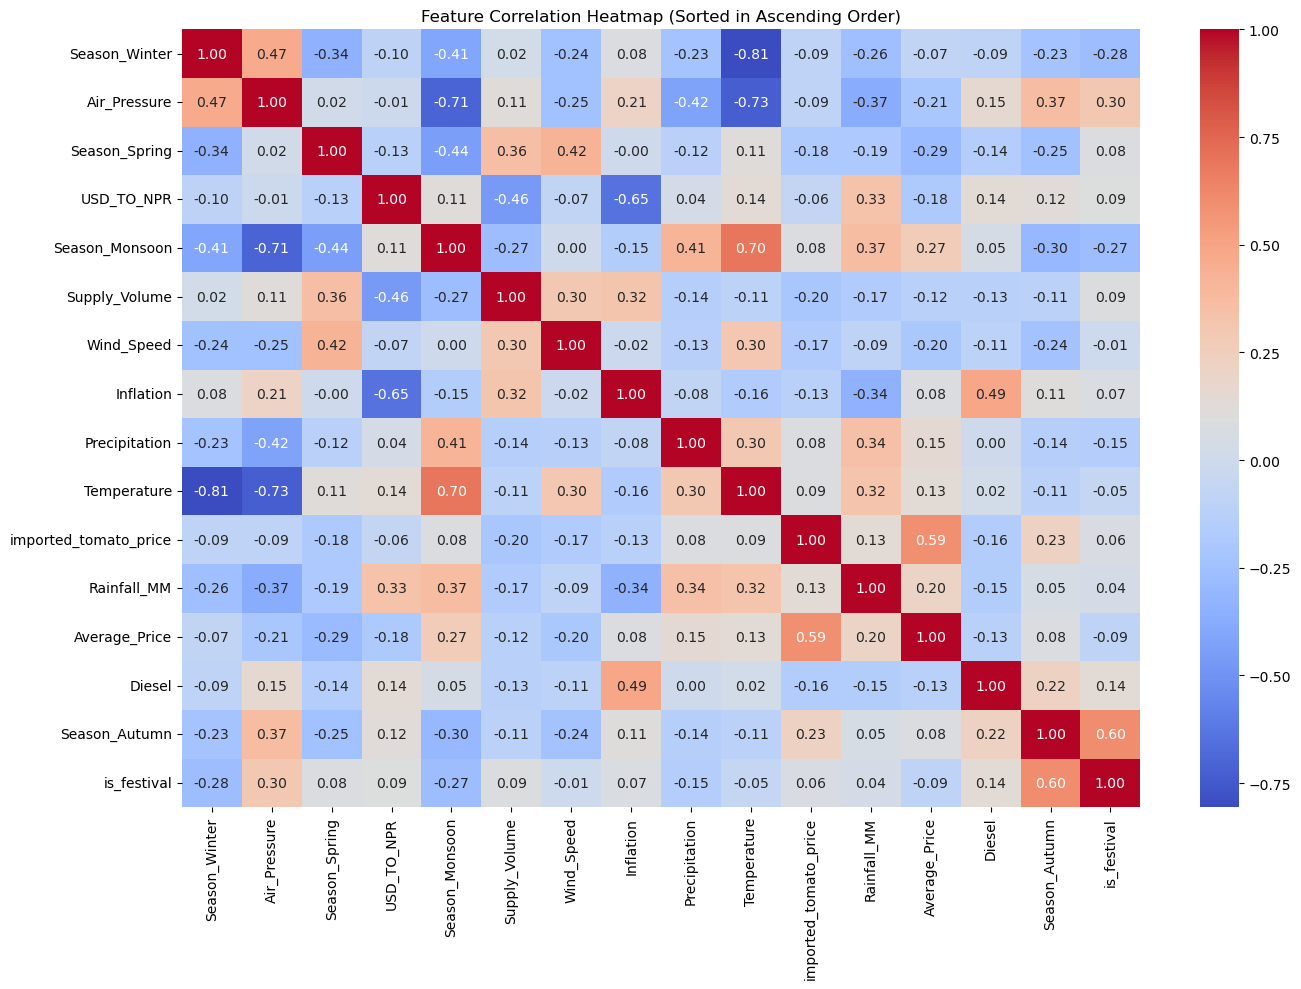

 Saved: artifacts/eda_images/correlation_heatmap_default.png


In [37]:
# Compute correlation matrix
corr = df[num_cols].corr()

# Sort features by mean correlation value (ascending order)
sorted_cols = corr.mean().sort_values(ascending=True).index
corr_sorted = corr.loc[sorted_cols, sorted_cols]

# Plot heatmap
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(corr_sorted, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
ax.set_title("Feature Correlation Heatmap (Sorted in Ascending Order)")
plt.tight_layout()
plt.show()

# Save figure
save_fig(fig, "correlation_heatmap_default")

In [38]:
# --- Pairplot (relationships) ---
# fig = sns.pairplot(df[num_cols], diag_kind="kde")
# fig.fig.suptitle("Pairwise Relationships", y=1.02)
# fig.savefig("artifacts/eda_images/pairplot.png", dpi=150)
# plt.show()
# plt.close()
# print("📸 Saved: artifacts/eda_images/pairplot.png")

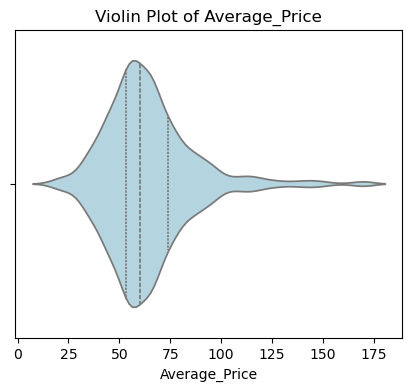

 Saved: artifacts/eda_images/violin_Average_Price.png


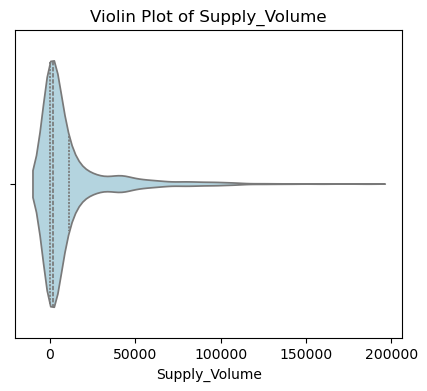

 Saved: artifacts/eda_images/violin_Supply_Volume.png


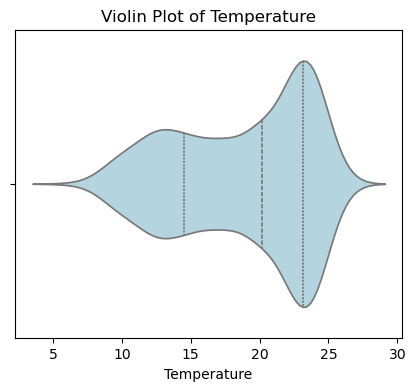

 Saved: artifacts/eda_images/violin_Temperature.png


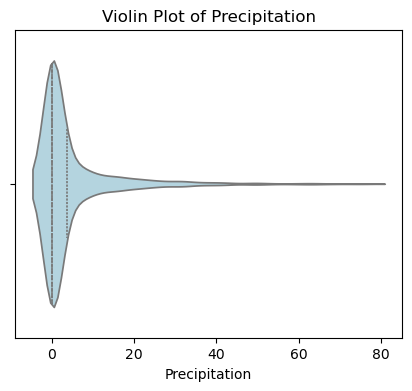

 Saved: artifacts/eda_images/violin_Precipitation.png


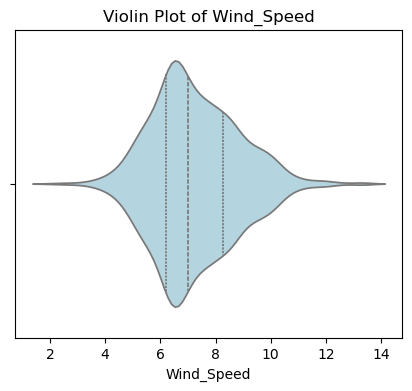

 Saved: artifacts/eda_images/violin_Wind_Speed.png


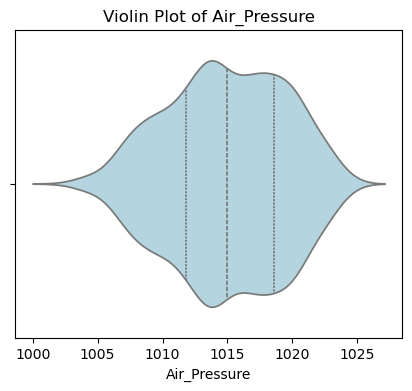

 Saved: artifacts/eda_images/violin_Air_Pressure.png


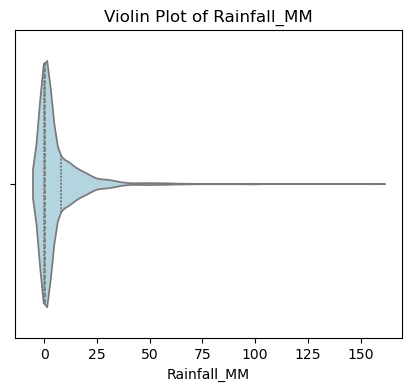

 Saved: artifacts/eda_images/violin_Rainfall_MM.png


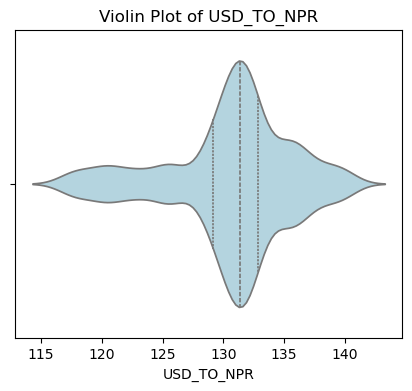

 Saved: artifacts/eda_images/violin_USD_TO_NPR.png


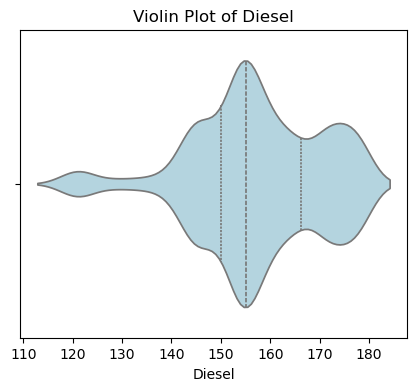

 Saved: artifacts/eda_images/violin_Diesel.png


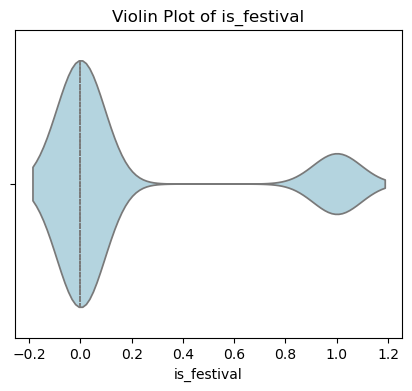

 Saved: artifacts/eda_images/violin_is_festival.png


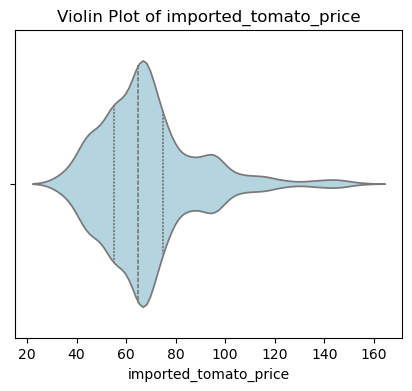

 Saved: artifacts/eda_images/violin_imported_tomato_price.png


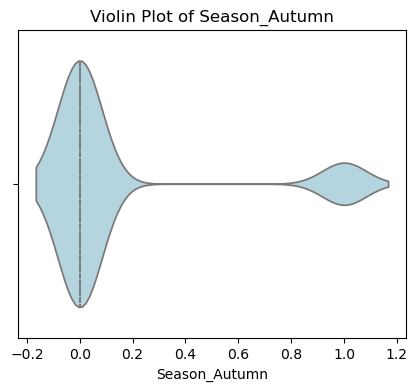

 Saved: artifacts/eda_images/violin_Season_Autumn.png


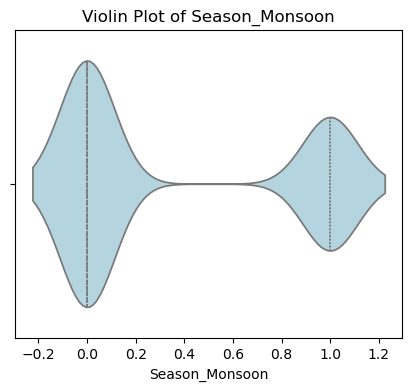

 Saved: artifacts/eda_images/violin_Season_Monsoon.png


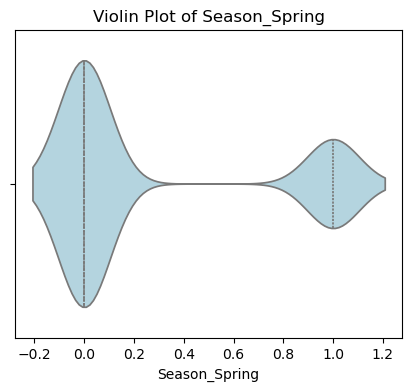

 Saved: artifacts/eda_images/violin_Season_Spring.png


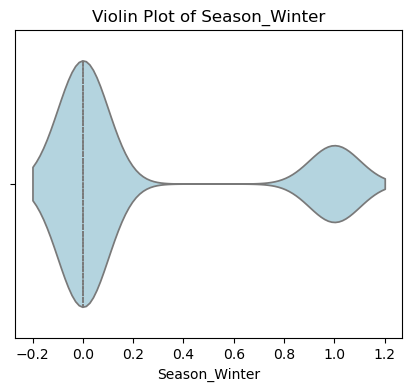

 Saved: artifacts/eda_images/violin_Season_Winter.png


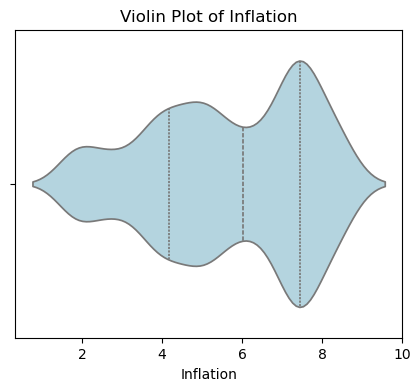

 Saved: artifacts/eda_images/violin_Inflation.png


In [39]:
# --- Violinplots to visualize distributions + outliers ---
for col in num_cols:
    fig, ax = plt.subplots(figsize=(5,4))
    sns.violinplot(x=df[col], inner="quartile", color='lightblue', ax=ax)
    ax.set_title(f"Violin Plot of {col}")
    plt.show()
    save_fig(fig, f"violin_{col}")


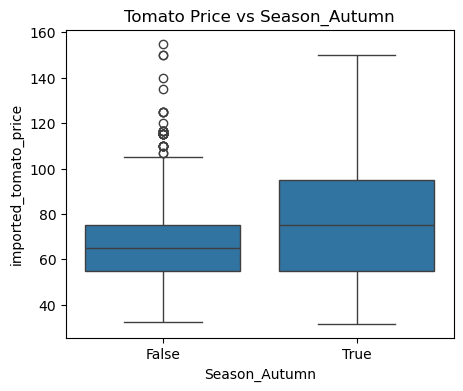

 Saved: artifacts/eda_images/price_vs_Season_Autumn.png


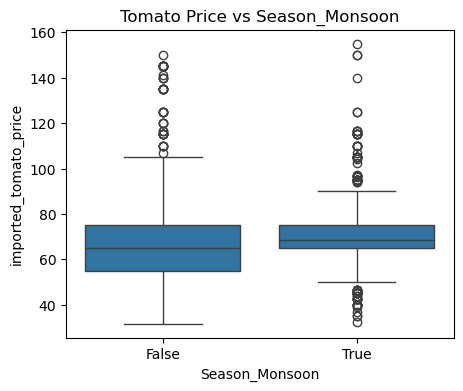

 Saved: artifacts/eda_images/price_vs_Season_Monsoon.png


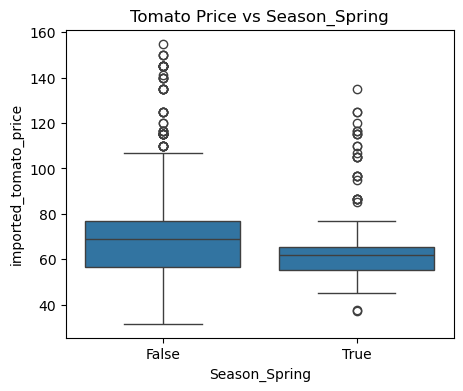

 Saved: artifacts/eda_images/price_vs_Season_Spring.png


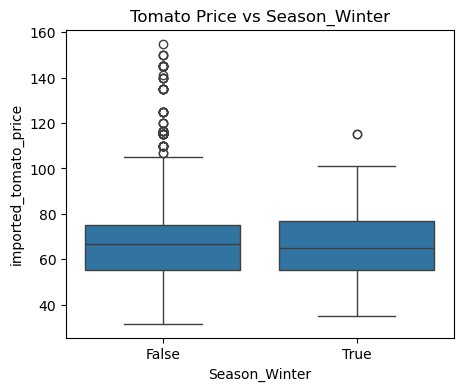

 Saved: artifacts/eda_images/price_vs_Season_Winter.png


In [40]:
if "imported_tomato_price" in df.columns:
    season_cols = [c for c in df.columns if c.startswith("Season_")]
    for season in season_cols:
        fig, ax = plt.subplots(figsize=(5,4))
        sns.boxplot(x=df[season], y=df["imported_tomato_price"], ax=ax)
        ax.set_title(f"Tomato Price vs {season}")
        plt.show()
        save_fig(fig, f"price_vs_{season}")

In [41]:
if not np.issubdtype(df['Date'].dtype, np.datetime64):
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where date parsing failed
df = df.dropna(subset=['Date']).reset_index(drop=True)

# --- Temporal Decomposition ---
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['day_of_week'] = df['Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)


# Monthly (annual) pattern
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

print("\n Temporal & Cyclical features extracted:")
print(df[['Date', 'day', 'month', 'day_of_week', 'is_weekend',
          'month_sin', 'month_cos']].head())


 Temporal & Cyclical features extracted:
        Date  day  month  day_of_week  is_weekend  month_sin  month_cos
0 2022-01-01    1      1            5           1        0.5   0.866025
1 2022-01-02    2      1            6           1        0.5   0.866025
2 2022-01-03    3      1            0           0        0.5   0.866025
3 2022-01-04    4      1            1           0        0.5   0.866025
4 2022-01-05    5      1            2           0        0.5   0.866025


In [42]:
# --------- Feature Engineering: Lagged Features ---------
def create_lag_features(df, target_col, lags=[1,2,3]):
    """Create lag features based on previous days' target values."""
    df_lagged = df.copy()
    for target in target_col:
        for lag in lags:
            df_lagged[f"{target}_lag{lag}"] = df_lagged[target].shift(lag)
        return df_lagged


def create_rolling_features(df, target_cols, windows=[3, 7],use_std=False):
    """Create rolling mean and std features for one or more target columns."""
    df_roll = df.copy()
    
    # Ensure target_cols is a list
    if isinstance(target_cols, str):
        target_cols = [target_cols]
    
    for target in target_cols:
        for w in windows:
            df_roll[f"{target}_rollmean_{w}"] = df_roll[target].rolling(window=w).mean()
            if use_std:
                df_roll[f"{target}_rollstd_{w}"] = df_roll[target].rolling(window=w).std()
    
    return df_roll


def combine_lag_and_roll(df, target_cols, lags=lag_range, windows=roll_range):
    """Combine lag and rolling features for one or more target columns."""
    df_combo = create_lag_features(df, target_cols, lags)
    df_combo = create_rolling_features(df_combo, target_cols, windows)
    df_combo = df_combo.dropna().reset_index(drop=True)
    return df_combo

In [43]:

df_with_lags = create_lag_features(df, engineer_feature_cols, lags=lag_range) #defined at the top of the notebook for easier modification and testing
df_with_rolls = create_rolling_features(df, engineer_feature_cols, windows=roll_range,use_std=standard_deviation_lag)  #defined at the top of the notebook for easier modification and testing
df_with_lag_roll = combine_lag_and_roll(df, engineer_feature_cols)

In [44]:
print("\n Lagged and Rolling Features Created")
display(df_with_lag_roll.head())




 Lagged and Rolling Features Created


,Date,Average_Price,Supply_Volume,Temperature,Precipitation,Wind_Speed,Air_Pressure,Rainfall_MM,USD_TO_NPR,Diesel,...,Average_Price_lag30,Average_Price_rollmean_7,Average_Price_rollmean_30,Average_Price_rollmean_90,Supply_Volume_rollmean_7,Supply_Volume_rollmean_30,Supply_Volume_rollmean_90,imported_tomato_price_rollmean_7,imported_tomato_price_rollmean_30,imported_tomato_price_rollmean_90
0,2022-03-31,55.00,107060.0,20.5,0.0,9.8,1014.3,0.0,119.96,138.0,...,66.67,60.000000,59.451000,68.485222,87601.071429,76907.966667,43906.766667,61.191429,59.650924,68.010950
1,2022-04-01,56.67,110200.0,20.8,0.0,7.1,1014.3,0.0,119.47,138.0,...,56.67,58.810000,59.451000,67.837111,76783.928571,78487.966667,45131.211111,59.762857,59.595258,67.499838
2,2022-04-02,56.67,106650.0,21.8,0.0,9.8,1016.2,0.0,120.21,138.0,...,56.67,57.620000,59.451000,67.189000,79739.642857,81251.300000,46227.322222,58.572857,59.595258,66.851727
3,2022-04-03,55.00,141475.0,22.2,0.0,8.5,1015.4,0.0,120.21,138.0,...,60.84,56.191429,59.256333,66.744556,91403.928571,84780.466667,47550.655556,57.144286,59.139667,66.407283
4,2022-04-04,55.00,105025.0,22.0,0.0,11.0,1014.9,0.0,120.21,138.0,...,65.00,55.477143,58.923000,66.281556,98884.285714,86699.633333,48628.711111,55.477143,58.806333,65.944283


In [45]:
# --------- Save cleaned datasets ---------
no_lag_path = "artifacts/data/clean_data.csv"
lagged_path = "artifacts/data/clean_data_with_lags.csv"
roll_path = "artifacts/data/clean_data_with_lag_roll.csv"

df.to_csv(no_lag_path, index=False)
df_with_lags.dropna().to_csv(lagged_path, index=False)
df_with_lag_roll.to_csv(roll_path, index=False)

print(f"\n Saved cleaned data (no lags) → {no_lag_path}")
print(f" Saved lag-only data → {lagged_path}")
print(f" Saved lag + rolling data → {roll_path}")


 Saved cleaned data (no lags) → artifacts/data/clean_data.csv
 Saved lag-only data → artifacts/data/clean_data_with_lags.csv
 Saved lag + rolling data → artifacts/data/clean_data_with_lag_roll.csv


In [46]:
df.columns

Index(['Date', 'Average_Price', 'Supply_Volume', 'Temperature',
       'Precipitation', 'Wind_Speed', 'Air_Pressure', 'Rainfall_MM',
       'USD_TO_NPR', 'Diesel', 'is_festival', 'imported_tomato_price',
       'Season_Autumn', 'Season_Monsoon', 'Season_Spring', 'Season_Winter',
       'Inflation', 'day', 'month', 'day_of_week', 'is_weekend', 'month_sin',
       'month_cos'],
      dtype='object')

✅ Saved Climate correlation heatmap → artifacts/eda/correlations\corr_climate.png
✅ Saved Economic correlation heatmap → artifacts/eda/correlations\corr_economic.png
✅ Saved Market correlation heatmap → artifacts/eda/correlations\corr_market.png
✅ Saved Temporal correlation heatmap → artifacts/eda/correlations\corr_temporal.png

📊 All correlation heatmaps generated and saved.


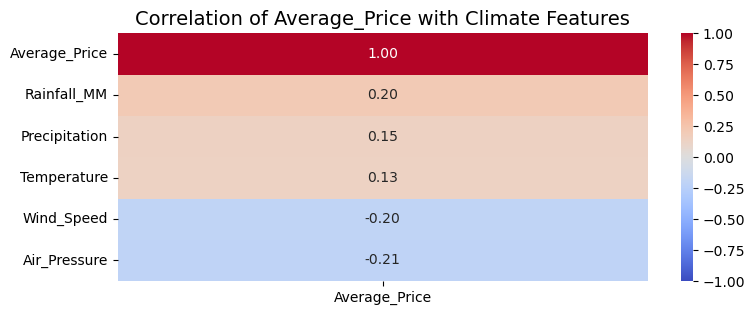

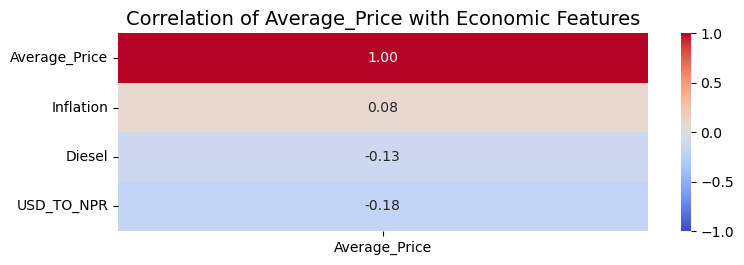

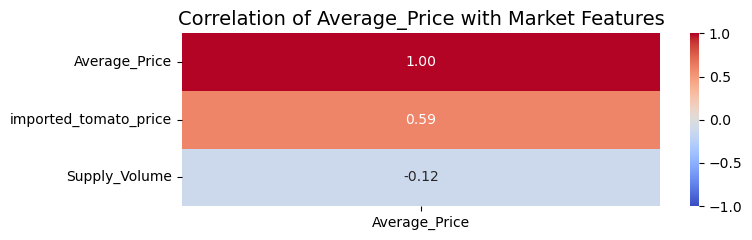

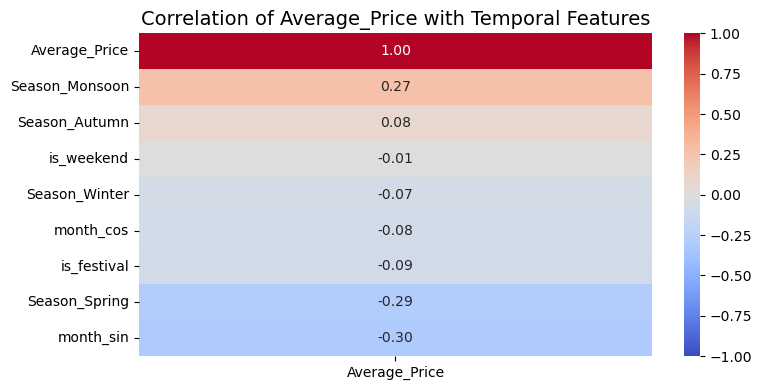

In [47]:
climate_cols = [
    'Temperature', 'Precipitation', 'Wind_Speed', 'Air_Pressure', 'Rainfall_MM'
]

economic_cols = [
    'USD_TO_NPR', 'Diesel', 'Inflation'
]

market_cols = [
    'Supply_Volume', 'imported_tomato_price'  # include only if not leakage in this context
]

temporal_cols = [
    'is_festival', 'Season_Autumn', 'Season_Monsoon', 'Season_Spring', 'Season_Winter',
    'is_weekend', 'month_sin', 'month_cos'
]

# ============================================================
# ✅ Helper Function: Correlation Heatmap & Save Artifact
# ============================================================

def plot_and_save_corr(df, cols, title, save_dir="artifacts/eda/correlations"):
    os.makedirs(save_dir, exist_ok=True)
    
    subset = df[['Average_Price'] + cols].copy()
    corr = subset.corr(numeric_only=True)
    
    plt.figure(figsize=(8, len(cols) * 0.25 + 2))
    sns.heatmap(
        corr[['Average_Price']].sort_values(by='Average_Price', ascending=False),
        annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f"
    )
    plt.title(f'Correlation of Average_Price with {title} Features', fontsize=14)
    plt.tight_layout()

    # Save plot
    save_path = os.path.join(save_dir, f"corr_{title.lower()}.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.plot()
    # plt.close()

    print(f"✅ Saved {title} correlation heatmap → {save_path}")

# ============================================================
# ✅ Generate and Save Correlation Plots
# ============================================================

plot_and_save_corr(df, climate_cols, 'Climate')
plot_and_save_corr(df, economic_cols, 'Economic')
plot_and_save_corr(df, market_cols, 'Market')
plot_and_save_corr(df, temporal_cols, 'Temporal')

print("\n📊 All correlation heatmaps generated and saved.")
